$$y = mx +b$$
$$m = \frac{\sum{(x_i-\bar{x})(y_i-\bar{y})}}{\sum{(x_i-\bar{x})^2}}$$
$$b = \bar{y} - m\cdot\bar{x}$$

In [3]:
import numpy as np

class LinearRegression:

    def __init__(self):
        self.slope = 0
        self.intercept = 0

    def fit(self, X, y):
        x_mean = np.mean(X)
        y_mean = np.mean(y)

        numerator = np.sum((X - x_mean) * (y - y_mean))
        denominator = np.sum((X-x_mean)**2)

        self.slope = numerator / denominator
        self.intercept = y_mean - (self.slope * x_mean)

    def predict(self, X):
        return self.slope * X + self.intercept

In [6]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegression()
lr.fit(X, y)
print(lr.slope)  # Output: 0.6
print(lr.intercept)  # Output: 2.2
y_pred = lr.predict(X)
print(y_pred)  # Output: [2.8, 3.4, 4.0, 4.6, 5.2]

0.6
2.2
[2.8 3.4 4.  4.6 5.2]


# Vectorized
$$y = w_0 + w_1.x_1 + w_2.x_2 + ... + w_n.x_n = X. W$$
$$W = (X^{T}X)^{-1}X^{T}y$$
Note:
1. Here the `X` includes bias term: `1`
1. `numpy.linalg.inv()` calculate the inverse of a matrix
2. `X @ Y` is maatrix multiplication assuming X has shape `(N, K)` and Y of shape `(K, M)`, the output will have shape `(N, M)`

In [18]:
class LinearRegression:

    def __init__(self):
        self.W = None
    
    def fit(self, X, y):
        '''
        X: input data, shape = (n_samples, n_features)
        y: target data, shape = (n_samples)
        '''
        y = y.reshape(-1, 1)
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.W = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return X @ self.W

In [19]:
# Create example input data
X = np.array([[2, 2], [4, 5], [7, 8]])
y = np.array([9, 17, 26])

# Fit linear regression model
lr = LinearRegression()
lr.fit(X, y)
print(lr.W) # [3. 1. 2.]

# Make predictions on new data
X_new = np.array([[10, 11], [13, 14]])
y_pred = lr.predict(X_new)
print(y_pred)  # Output: [43. 55.]

[[3.]
 [1.]
 [2.]]
[[35.]
 [44.]]


# Gradiant Descent
cost function:
$$Loss=\sum{(y_{pred} - y)^2}=\sum{(XW-y)^2}$$ 
gradient:
$$2\cdot X^T(XW-y)$$
***

Let's derive the gradient of the loss with respect to W step by step.

$$\frac{\partial}{\partial W}(XW-y)^2 = 2(XW-y)X$$

$$\nabla_W Loss = \sum{2(XW-y)X} = 2X^T(XW-y)$$


$$\nabla_W Loss = 2X^T(XW-y)$$

In code, this would be implemented as:
```python
gradient = 2 * X.T @ (X @ W - y)
```

And the gradient descent update rule would be:
```python
W := W - α * X.T @ (X @ W - y)
```
where α is the learning rate.

Note: Sometimes you'll see this written with a (1/m) term to take the mean rather than sum:
$$\nabla_W Loss = \frac{2}{m}X^T(XW-y)$$

In [71]:
class LinearRegressionGD:

    def __init__(self):
        self.W = None
    
    def fit(self, X, y, num_iter=100, lr=0.01, lambda_=1):
        '''
        X: input data, shape = (n_samples, n_features)
        y: target data, shape = (n_samples)
        '''
        # check dimensions
        y = y.reshape(-1, 1)
        assert X.shape[0] == y.shape[0]

        # add bias term
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        
        self.W = np.zeros((X.shape[1], y.shape[1]))
        for i in range(num_iter):
            y_pred = X @ self.W
            cost = np.sum((y_pred - y) ** 2) + lambda_ * np.sum(self.W ** 2)
            gradient = 2 * X.T @ (y_pred - y) + 2 * lambda_ * self.W

            # update W
            self. W = self.W - lr * gradient

            # print
            if i % 1000 == 0:
                print(f'Iter: {i}, Cost: {cost}')

    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return X @ self.W

In [72]:
X = np.array([[1, 2, 3, 4, 5]]).T
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegressionGD()
lr.fit(X, y, lr=0.01, num_iter=10000, lambda_=0.1)
print(lr.W)  # Output: [ 1.99964292  0.65345474 ]
y_pred = lr.predict(X)
print(y_pred)  # # Output: [2.65309766, 3.3065524, 3.96000714, 4.61346188, 5.26691662]


Iter: 0, Cost: 86.0
Iter: 1000, Cost: 2.8791287270130335
Iter: 2000, Cost: 2.8791287270130344
Iter: 3000, Cost: 2.8791287270130344
Iter: 4000, Cost: 2.8791287270130344
Iter: 5000, Cost: 2.8791287270130344
Iter: 6000, Cost: 2.8791287270130344
Iter: 7000, Cost: 2.8791287270130344
Iter: 8000, Cost: 2.8791287270130344
Iter: 9000, Cost: 2.8791287270130344
[[1.99964292]
 [0.65345474]]
[[2.65309766]
 [3.3065524 ]
 [3.96000714]
 [4.61346188]
 [5.26691662]]


Visualize

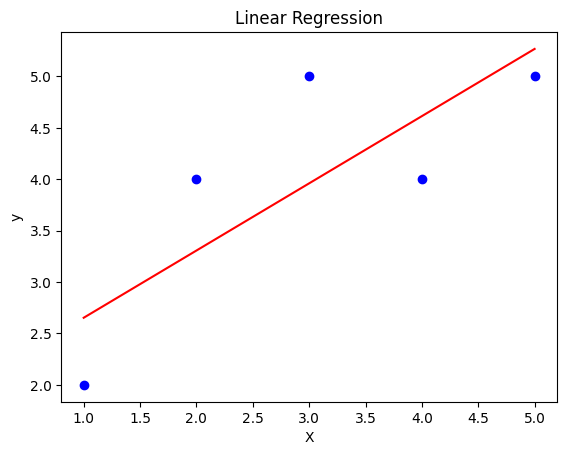

In [73]:
import matplotlib.pyplot as plt 

# Plot the data and the linear regression line
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()